In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [6]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [8]:
y_pred_logistic = logistic_model.predict_proba(X_test)[:, 1]
y_pred_rf = random_forest_model.predict_proba(X_test)[:, 1]

In [10]:
import pandas as pd

test_df = pd.DataFrame(
    {"True": y_test, "Logistic": y_pred_logistic, "RandomForest": y_pred_rf}
)
test_df

,True,Logistic,RandomForest
0,1,0.648888,0.75
1,1,0.867905,0.79
2,1,0.475407,0.25
3,1,0.852635,0.89
4,1,0.955500,0.99
...,...,...,...
195,1,0.924023,0.91
196,1,0.996863,0.94
197,1,0.987716,0.90
198,0,0.222580,0.09


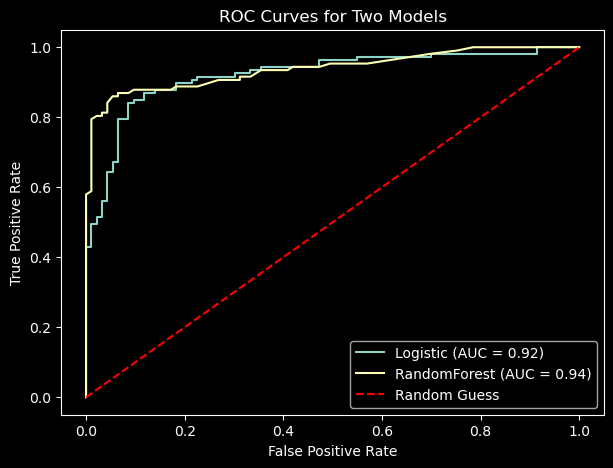

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(7, 5))

for model in ["Logistic", "RandomForest"]:
    fpr, tpr, _ = roc_curve(test_df["True"], test_df[model])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "r--", label="Random Guess")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Two Models")
plt.legend()
plt.show()

In [14]:
X, y = make_classification(
    n_samples=1000, n_features=20, n_classes=3, n_informative=10, random_state=42
)

In [17]:
from sklearn.preprocessing import label_binarize
import numpy as np

y_bin = label_binarize(y, classes=np.unique(y))

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_bin, test_size=0.2, random_state=42
)

In [20]:
from sklearn.multiclass import OneVsRestClassifier

logistic_model = OneVsRestClassifier(LogisticRegression(random_state=42))
logistic_model.fit(X_train, y_train)

,estimator,LogisticRegre...ndom_state=42)
,n_jobs,None
,verbose,0
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42


In [21]:
rf_model = OneVsRestClassifier(
    RandomForestClassifier(n_estimators=100, random_state=42)
)
rf_model.fit(X_train, y_train)

,estimator,RandomForestC...ndom_state=42)
,n_jobs,None
,verbose,0
,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None


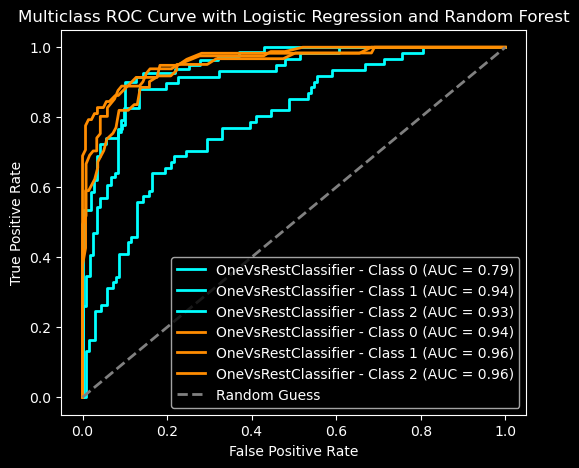

In [35]:
from itertools import cycle

fpr = dict()
tpr = dict()
roc_auc = dict()

models = [logistic_model, rf_model]

plt.figure(figsize=(6, 5))
colors = cycle(["aqua", "darkorange"])

for model, color in zip(models, colors):
    for i in range(model.classes_.shape[0]):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], model.predict_proba(X_test)[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(
            fpr[i],
            tpr[i],
            color=color,
            lw=2,
            label=f"{model.__class__.__name__} - Class {i} (AUC = {roc_auc[i]:.2f})",
        )

plt.plot([0, 1], [0, 1], "--", lw=2, label="Random Guess", color="grey")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve with Logistic Regression and Random Forest")
plt.legend(loc="lower right")
plt.show()